In [23]:
dataframe = pd.read_csv('cleaned_data.csv')


In [24]:
dataframe 

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Gls,Sh,SoT%,G/Sh,Dist,FK,PK,Season,Team
0,2019-08-10,12:30,Premier League,Matchweek 1,Sat,Away,W,5,0,West Ham,...,4-2-3-1,5,13.0,61.5,0.31,16.7,0.0,1,2019-2020,Manchester City
1,2019-08-17,17:30,Premier League,Matchweek 2,Sat,Home,D,2,2,Tottenham,...,4-2-3-1,2,30.0,33.3,0.07,15.4,0.0,0,2019-2020,Manchester City
2,2019-08-25,14:00,Premier League,Matchweek 3,Sun,Away,W,3,1,Bournemouth,...,5-4-1,3,18.0,27.8,0.17,14.8,0.0,0,2019-2020,Manchester City
3,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,W,4,0,Brighton,...,3-4-3,4,15.0,40.0,0.27,15.4,1.0,0,2019-2020,Manchester City
4,2019-09-14,17:30,Premier League,Matchweek 5,Sat,Away,L,2,3,Norwich City,...,4-2-3-1,2,25.0,32.0,0.08,15.1,0.0,0,2019-2020,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,...,4-2-3-1,2,10.0,40.0,0.20,17.8,1.0,0,2023-2024,Sheffield United
3188,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,...,4-3-3,1,15.0,26.7,0.07,13.5,0.0,0,2023-2024,Sheffield United
3189,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,...,4-2-3-1,1,16.0,25.0,0.00,18.0,0.0,1,2023-2024,Sheffield United
3190,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,...,4-4-1-1,0,13.0,7.7,0.00,21.0,0.0,0,2023-2024,Sheffield United


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3192 non-null   object 
 1   Time           3192 non-null   object 
 2   Comp           3192 non-null   object 
 3   Round          3192 non-null   object 
 4   Day            3192 non-null   object 
 5   Venue          3192 non-null   object 
 6   Result         3192 non-null   object 
 7   GF             3192 non-null   int64  
 8   GA             3192 non-null   int64  
 9   Opponent       3192 non-null   object 
 10  xG             3192 non-null   float64
 11  xGA            3192 non-null   float64
 12  Poss           3192 non-null   float64
 13  Attendance     2486 non-null   float64
 14  Formation      3192 non-null   object 
 15  Opp Formation  3192 non-null   object 
 16  Gls            3192 non-null   int64  
 17  Sh             3192 non-null   float64
 18  SoT%    

In [27]:
dataframe_sub = dataframe[['Team' , 'Opponent' , 'Venue' , 'Season' , 'Result']] 

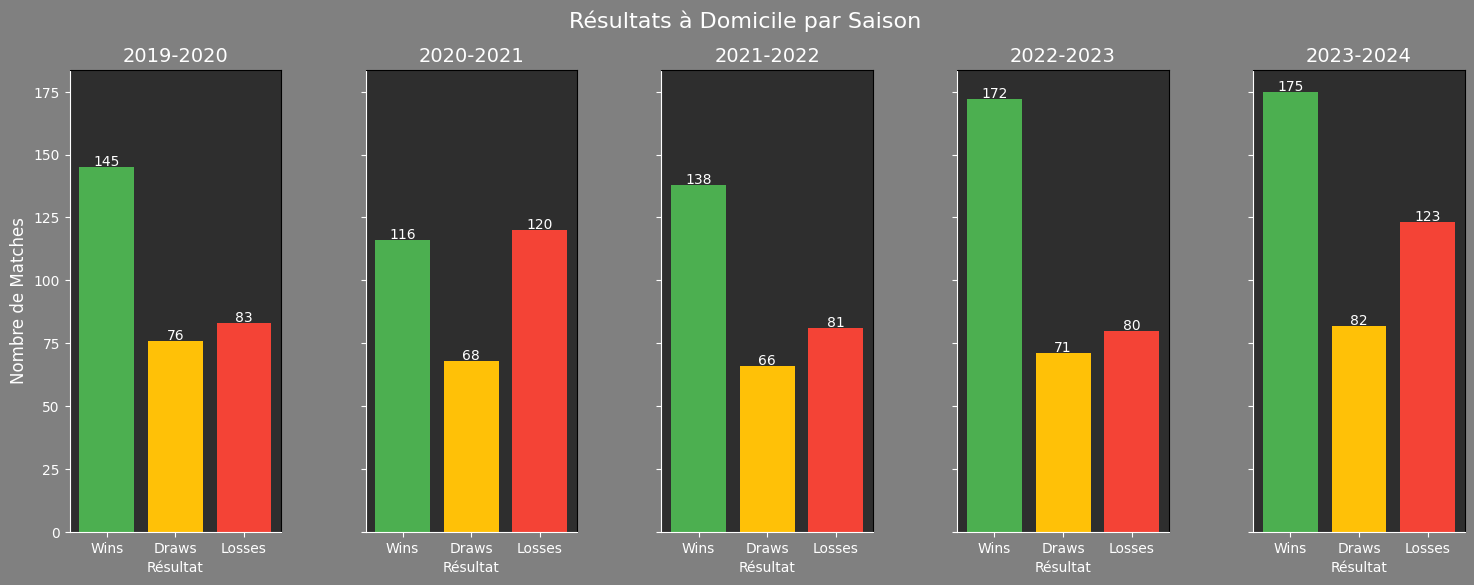

In [29]:
import matplotlib.pyplot as plt
dataframe_ATT = dataframe[dataframe['Venue'] == 'Home']
home_results = (dataframe_ATT.groupby(['Season' , 'Result']).size().unstack(fill_value=0).rename(columns={"W": "Wins", "D": "Draws", "L": "Losses"})) 
home_results = home_results[['Wins', 'Draws', 'Losses']]
# Configuration des graphiques
num_seasons = len(home_results)
fig, axes = plt.subplots(1, num_seasons, figsize=(18, 6), sharey=True)
fig.patch.set_facecolor('gray')  # Arrière-plan gris pour tout le graphe
plt.subplots_adjust(wspace=0.4)

# Couleurs des barres
colors = ['#4CAF50', '#FFC107', '#F44336']  # Vert pour victoires, Jaune pour nuls, Rouge pour défaites

# Parcourir chaque saison et tracer son graphique
for i, (season, results) in enumerate(home_results.iterrows()):
    ax = axes[i]
    ax.bar(results.index, results.values, color=colors)
    ax.set_title(season, fontsize=14, color="white")
    ax.set_xlabel("Résultat", fontsize=10, color="white")
    if i == 0:
        ax.set_ylabel("Nombre de Matches", fontsize=12, color="white")
    
    # Ajouter des annotations au-dessus des barres
    for j, value in enumerate(results.values):
        ax.text(j, value + 0.5, str(value), ha='center', fontsize=10, color='white')

    # Personnalisation du style
    ax.set_facecolor('#2E2E2E')  # Arrière-plan gris foncé pour les sous-graphes
    ax.tick_params(colors='white')  # Couleur des ticks
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

# Titre principal
fig.suptitle("Résultats à Domicile par Saison", fontsize=16, color="white")

# Afficher le graphique
plt.show()


In [30]:
## elaborant que on peut 

In [31]:
season_2020 = dataframe[dataframe['Season'] == '2020-2021']

In [32]:
season_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 38 to 3153
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           608 non-null    object 
 1   Time           608 non-null    object 
 2   Comp           608 non-null    object 
 3   Round          608 non-null    object 
 4   Day            608 non-null    object 
 5   Venue          608 non-null    object 
 6   Result         608 non-null    object 
 7   GF             608 non-null    int64  
 8   GA             608 non-null    int64  
 9   Opponent       608 non-null    object 
 10  xG             608 non-null    float64
 11  xGA            608 non-null    float64
 12  Poss           608 non-null    float64
 13  Attendance     52 non-null     float64
 14  Formation      608 non-null    object 
 15  Opp Formation  608 non-null    object 
 16  Gls            608 non-null    int64  
 17  Sh             608 non-null    float64
 18  SoT%         

In [34]:
average_attendance = season_2020['Attendance'].mean()

In [35]:
average_attendance

5381.0192307692305

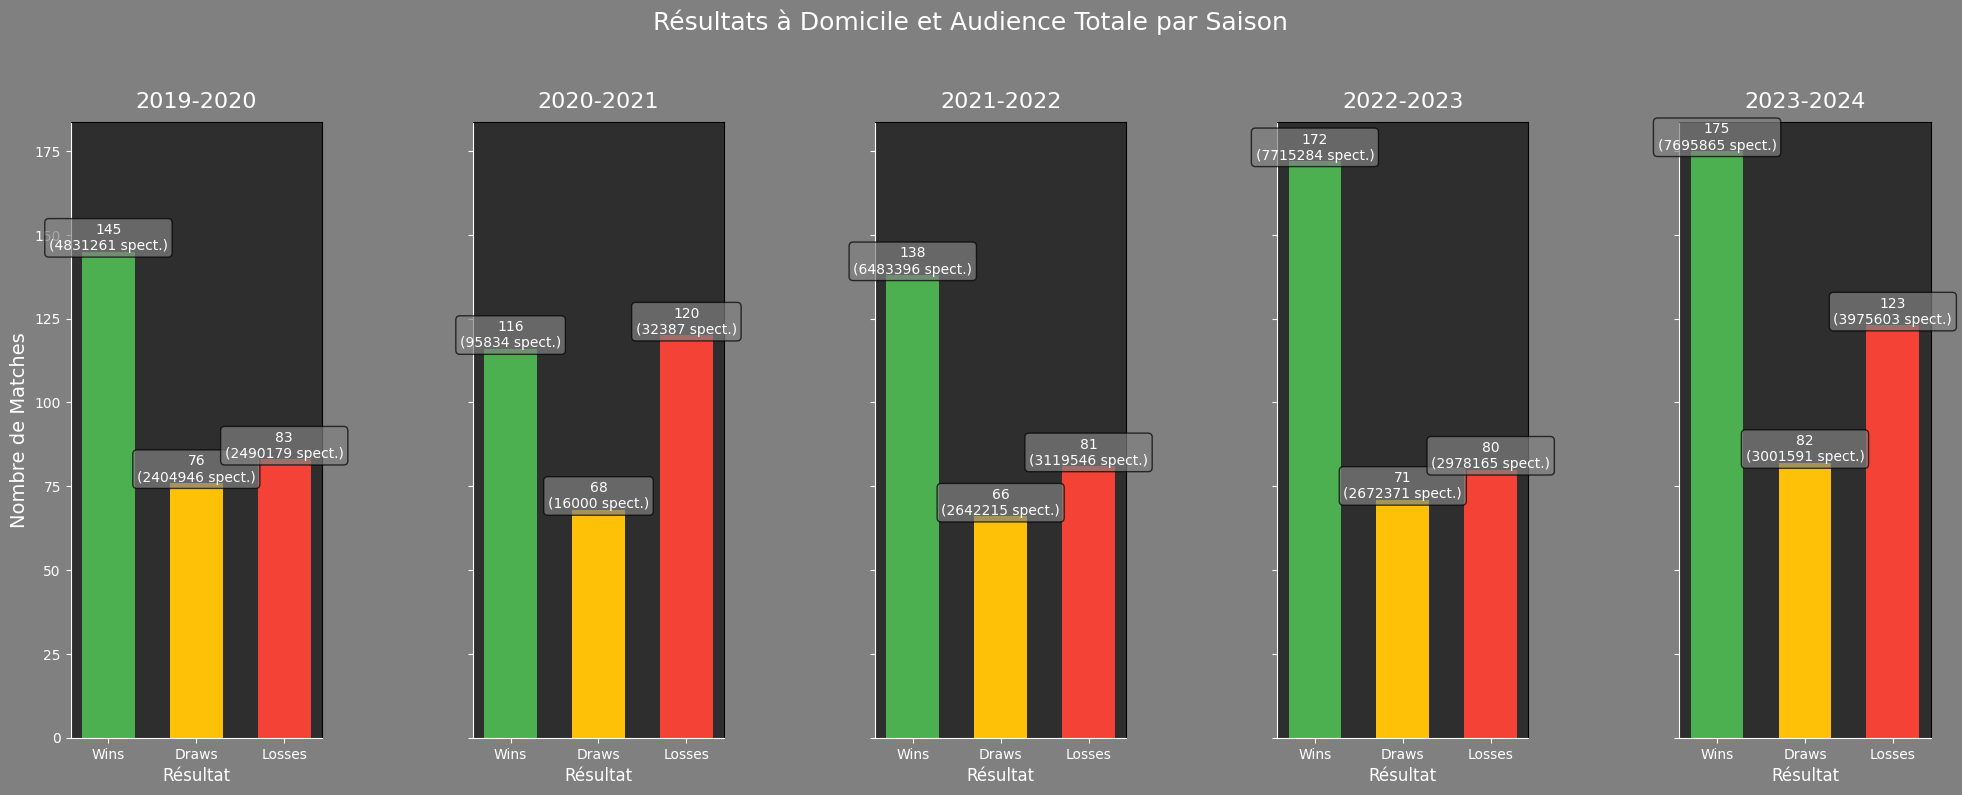

In [37]:
# Filtrer uniquement les matchs à domicile
home_matches = dataframe[dataframe['Venue'] == 'Home']

# Calculer le nombre de victoires, de nuls et de défaites par saison
home_results_summary = (
    home_matches.groupby(['Season', 'Result'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={"W": "Wins", "D": "Draws", "L": "Losses"})
)

# Calculer le total de l'audience pour chaque catégorie et chaque saison
audience_summary = (
    home_matches.groupby(['Season', 'Result'])['Attendance']
    .sum()
    .unstack(fill_value=0)
    .rename(columns={"W": "Wins_Audience", "D": "Draws_Audience", "L": "Losses_Audience"})
)

# Réorganiser les colonnes pour cohérence
home_results_summary = home_results_summary[['Wins', 'Draws', 'Losses']]
audience_summary = audience_summary[['Wins_Audience', 'Draws_Audience', 'Losses_Audience']]

# Configuration des graphiques
num_seasons = len(home_results_summary)
fig, axes = plt.subplots(1, num_seasons, figsize=(24, 8), sharey=True)  # Agrandir la figure
fig.patch.set_facecolor('gray')  # Arrière-plan gris pour tout le graphe
plt.subplots_adjust(wspace=0.6)  # Réduire l'espace entre les graphiques

# Couleurs des barres
colors = ['#4CAF50', '#FFC107', '#F44336']  # Vert pour victoires, Jaune pour nuls, Rouge pour défaites

# Parcourir chaque saison et tracer son graphique
for i, (season, results) in enumerate(home_results_summary.iterrows()):
    ax = axes[i]
    ax.bar(results.index, results.values, color=colors, width=0.6)  # Réduire la largeur pour plus d'espacement
    ax.set_title(season, fontsize=16, color="white", pad=10)  # Titre plus grand
    ax.set_xlabel("Résultat", fontsize=12, color="white")
    if i == 0:
        ax.set_ylabel("Nombre de Matches", fontsize=14, color="white")
    
    # Ajouter des annotations au-dessus des barres
    for j, value in enumerate(results.values):
        total_audience = audience_summary.loc[season, audience_summary.columns[j]]
        ax.text(j, value + 0.5, f"{value}\n({int(total_audience)} spect.)", 
                ha='center', fontsize=10, color='white', bbox=dict(facecolor='gray', alpha=0.7, boxstyle='round'))

    # Personnalisation du style
    ax.set_facecolor('#2E2E2E')  # Arrière-plan gris foncé pour les sous-graphes
    ax.tick_params(colors='white')  # Couleur des ticks
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

# Titre principal
fig.suptitle("Résultats à Domicile et Audience Totale par Saison", fontsize=18, color="white", y=1.02)

# Afficher le graphique
plt.show()


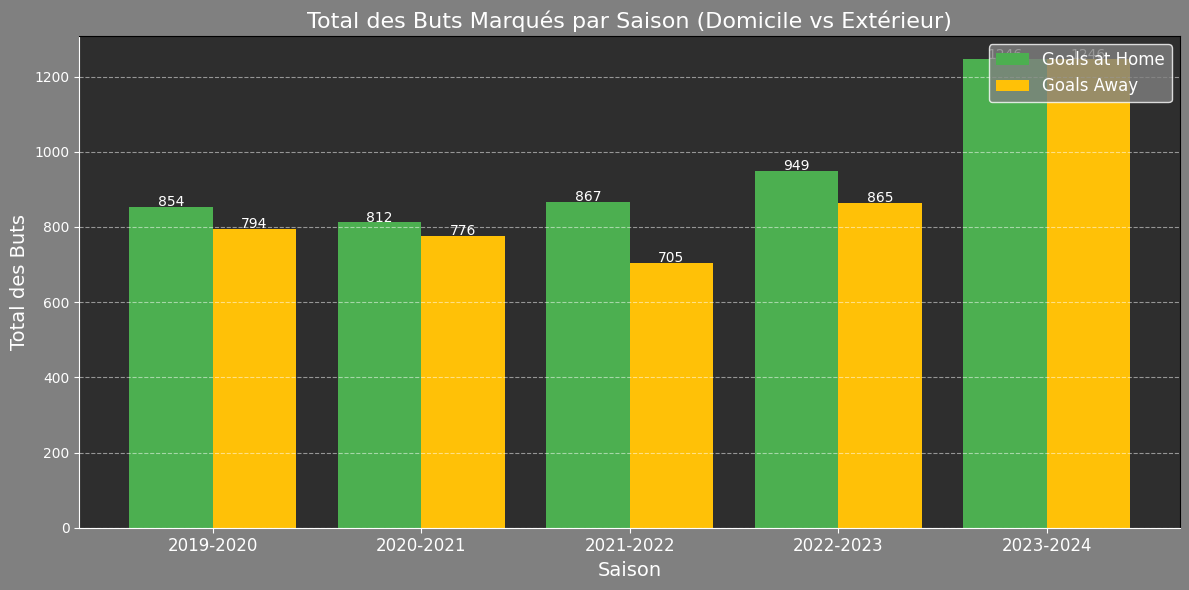

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple : Chargement du DataFrame
df = pd.read_csv("Premier_League_All_Teams_Combined.csv")

# Calculer le total des buts marqués par saison à domicile et à l'extérieur
goals_summary = (
    df.groupby('Season')[['GF', 'GA']].sum()
    .rename(columns={'GF': 'Goals at Home', 'GA': 'Goals Away'})
)

# Configuration du graphique
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('gray')  # Arrière-plan gris pour tout le graphique
bar_width = 0.4
x = range(len(goals_summary))

# Création des barres pour les buts marqués à domicile et à l'extérieur
ax.bar(
    [i - bar_width / 2 for i in x],
    goals_summary['Goals at Home'],
    width=bar_width,
    label="Goals at Home",
    color="#4CAF50",  # Vert
)
ax.bar(
    [i + bar_width / 2 for i in x],
    goals_summary['Goals Away'],
    width=bar_width,
    label="Goals Away",
    color="#FFC107",  # Jaune
)

# Ajouter les étiquettes des saisons en abscisse
ax.set_xticks(x)
ax.set_xticklabels(goals_summary.index, fontsize=12, color='white')

# Titre et légendes
ax.set_title("Total des Buts Marqués par Saison (Domicile vs Extérieur)", fontsize=16, color='white')
ax.set_xlabel("Saison", fontsize=14, color='white')
ax.set_ylabel("Total des Buts", fontsize=14, color='white')
ax.legend(fontsize=12, loc='upper right', facecolor='gray', edgecolor='white', labelcolor='white')

# Ajouter des annotations au-dessus des barres
for i, season in enumerate(goals_summary.index):
    home_goals = goals_summary.loc[season, 'Goals at Home']
    away_goals = goals_summary.loc[season, 'Goals Away']
    ax.text(i - bar_width / 2, home_goals + 2, str(home_goals), ha='center', fontsize=10, color='white')
    ax.text(i + bar_width / 2, away_goals + 2, str(away_goals), ha='center', fontsize=10, color='white')

# Personnalisation des ticks et du style
ax.set_facecolor('#2E2E2E')  # Arrière-plan gris foncé pour les sous-graphes
ax.tick_params(colors='white')  # Couleur des ticks
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Ajouter une grille discrète
ax.grid(axis='y', linestyle='--', alpha=0.5, color='white')

# Ajustement de la disposition et affichage
plt.tight_layout()
plt.show()


1. L'avantage du domicile est un facteur clé de performance
Les équipes à domicile marquent généralement plus de buts que les équipes en déplacement.
Cela s'explique par le soutien des supporters, une meilleure connaissance du terrain, et l'absence de fatigue liée aux déplacements.
Par exemple, une équipe comme Newcastle bénéficie d'un environnement familier et d'un soutien local, ce qui peut influencer son rendement à domicile.
2. Une exception notable : la saison 2020-2021
L'absence de public, due à la pandémie de COVID-19, a annulé l'effet motivant des supporters sur les équipes locales.
Les conditions de jeu sont devenues plus neutres, mettant les équipes locales et visiteuses sur un pied d'égalité.
Les calendriers irréguliers ont ajouté un stress supplémentaire, perturbant les performances globales.
3. Le retour à la normalité après 2021
Une fois les spectateurs revenus dans les stades, l'avantage à domicile a été rétabli, les équipes locales retrouvant leurs conditions optimales.
Les saisons post-pandémie (2021-2022 et suivantes) confirment que les équipes à domicile marquent de nouveau plus de buts.
4. Importance pour les modèles prédictifs
La saison 2020-2021 doit être traitée comme une anomalie dans les données.
Les modèles doivent intégrer l'avantage à domicile comme un facteur clé tout en ajustant pour les saisons atypiques comme celle de 2020-2021.
Des ajustements spécifiques, comme le contexte de jeu (huis clos, pandémie), doivent être intégrés pour améliorer la précision des prédictions.
En résumé, l'année 2020-2021 souligne l'impact crucial des facteurs humains et environnementaux sur les performances sportives, tandis que les tendances générales confirment l'importance de l'avantage à domicile dans les compétitions de haut niveau

In [42]:

dataframe.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Gls,Sh,SoT%,G/Sh,Dist,FK,PK,Season,Team
0,2019-08-10,12:30,Premier League,Matchweek 1,Sat,Away,W,5,0,West Ham,...,4-2-3-1,5,13.0,61.5,0.31,16.7,0.0,1,2019-2020,Manchester City
1,2019-08-17,17:30,Premier League,Matchweek 2,Sat,Home,D,2,2,Tottenham,...,4-2-3-1,2,30.0,33.3,0.07,15.4,0.0,0,2019-2020,Manchester City
2,2019-08-25,14:00,Premier League,Matchweek 3,Sun,Away,W,3,1,Bournemouth,...,5-4-1,3,18.0,27.8,0.17,14.8,0.0,0,2019-2020,Manchester City
3,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,W,4,0,Brighton,...,3-4-3,4,15.0,40.0,0.27,15.4,1.0,0,2019-2020,Manchester City
4,2019-09-14,17:30,Premier League,Matchweek 5,Sat,Away,L,2,3,Norwich City,...,4-2-3-1,2,25.0,32.0,0.08,15.1,0.0,0,2019-2020,Manchester City


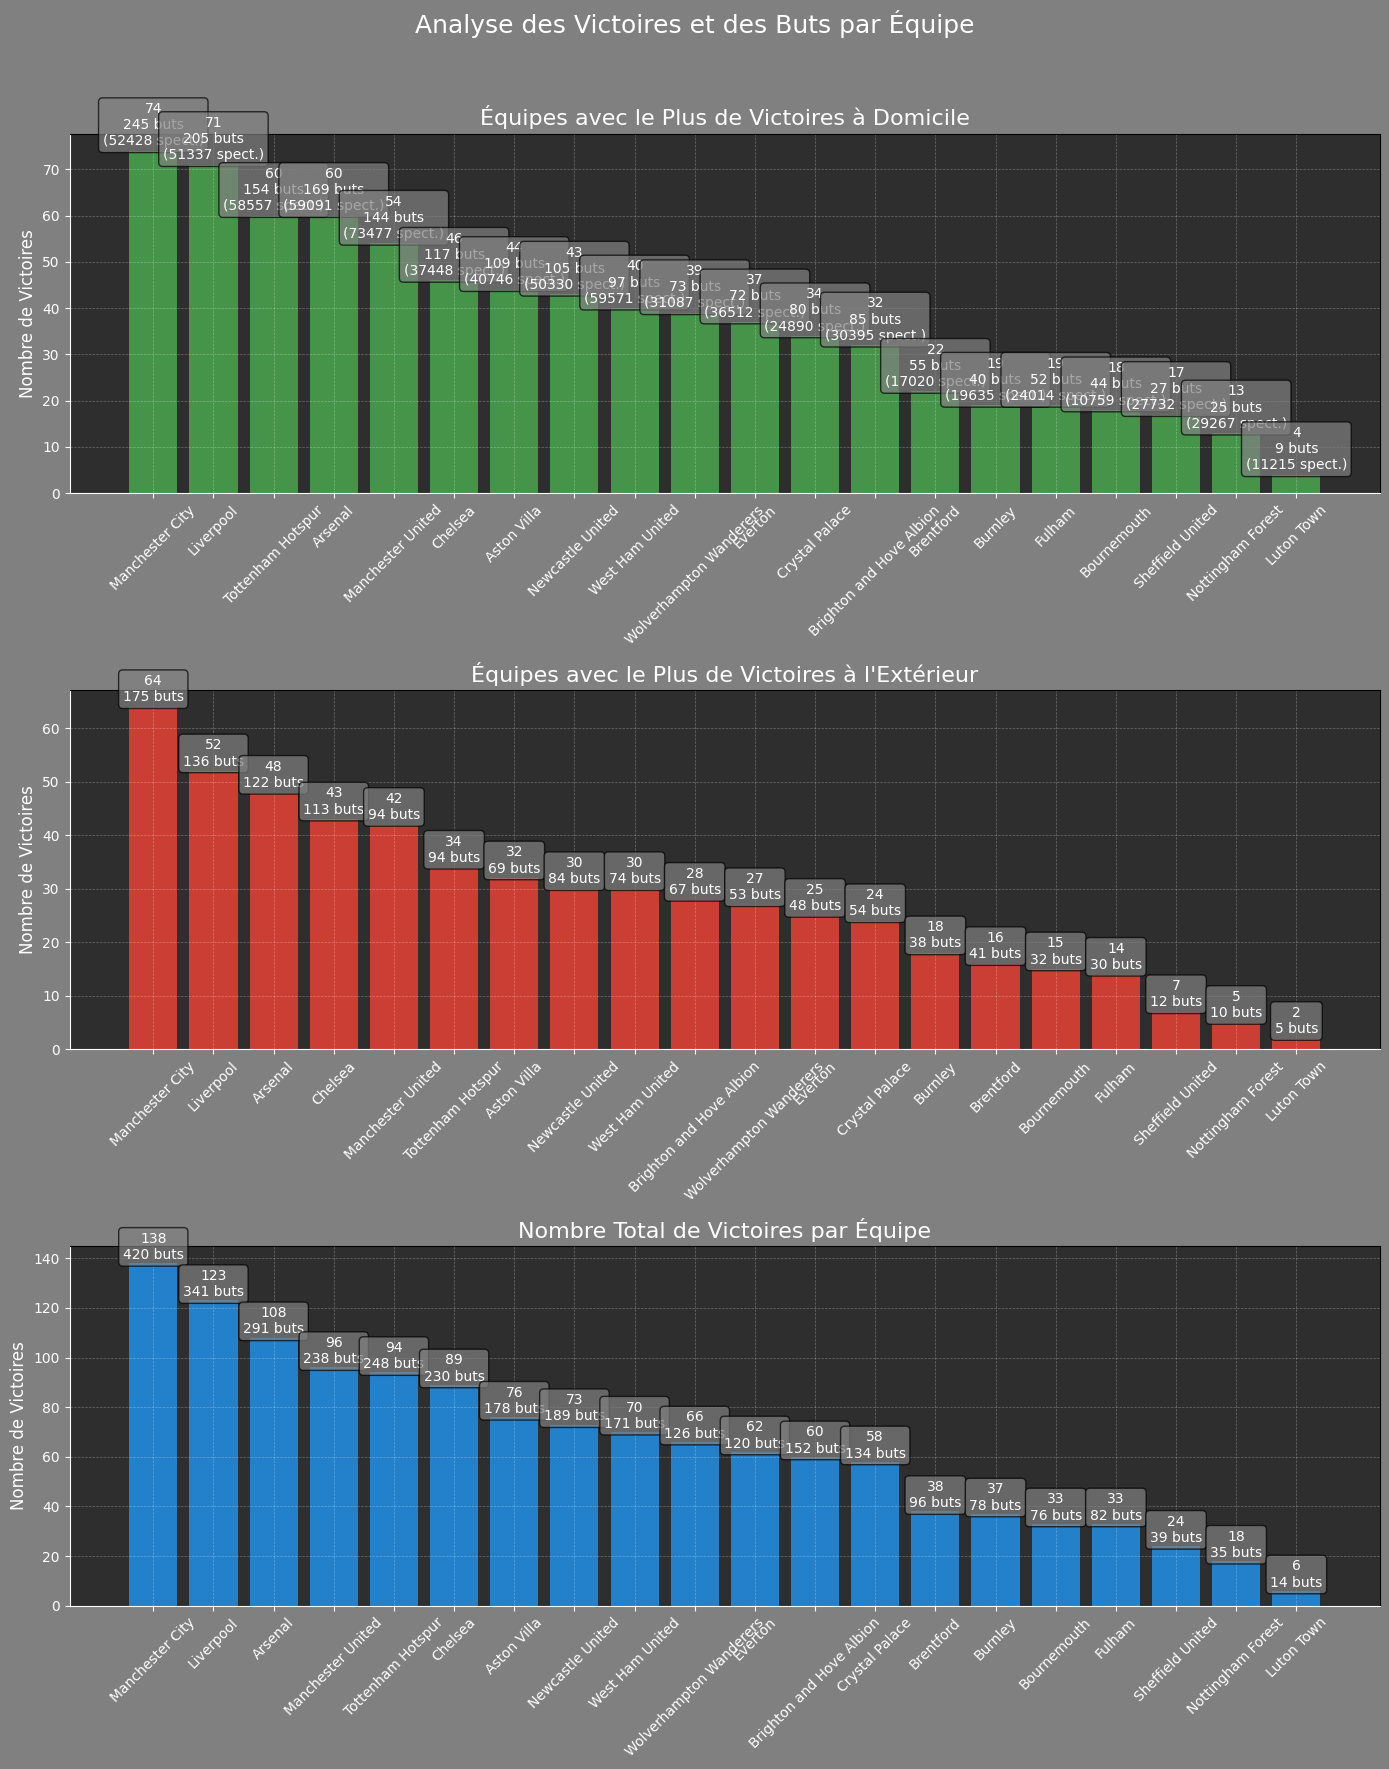

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du DataFrame
df = pd.read_csv("Premier_League_All_Teams_Combined.csv")

# Filtrer les victoires à domicile et à l'extérieur
home_wins = df[(df['Venue'] == 'Home') & (df['Result'] == 'W')]
away_wins = df[(df['Venue'] == 'Away') & (df['Result'] == 'W')]

# Calculer le nombre de victoires par équipe
home_wins_by_team = home_wins.groupby('Team').size().sort_values(ascending=False)
away_wins_by_team = away_wins.groupby('Team').size().sort_values(ascending=False)

# Calculer le nombre total de victoires par équipe
total_wins_by_team = home_wins_by_team.add(away_wins_by_team, fill_value=0).sort_values(ascending=False)

# Calculer le total des buts marqués à domicile et à l'extérieur
home_goals_by_team = home_wins.groupby('Team')['GF'].sum()
away_goals_by_team = away_wins.groupby('Team')['GF'].sum()

# Configuration des graphiques
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=False)

# Graphique 1 : Équipes avec le plus de victoires à domicile
axes[0].bar(home_wins_by_team.index, home_wins_by_team.values, color="#4CAF50", alpha=0.8)
axes[0].set_title("Équipes avec le Plus de Victoires à Domicile", fontsize=16, color="white")
axes[0].set_ylabel("Nombre de Victoires", fontsize=12, color="white")
axes[0].tick_params(axis='x', rotation=45, colors="white")
axes[0].tick_params(colors="white")

# Ajouter des annotations (victoires + buts + audience moyenne)
for i, team in enumerate(home_wins_by_team.index):
    victories = home_wins_by_team[team]
    goals = home_goals_by_team.get(team, 0)
    avg_audience = home_wins.groupby('Team')['Attendance'].mean().get(team, 0)
    axes[0].text(i, victories + 0.5, f"{victories}\n{goals} buts\n({int(avg_audience)} spect.)", 
                 ha='center', va='bottom', fontsize=10, color='white', 
                 bbox=dict(facecolor='gray', alpha=0.7, boxstyle='round'))

# Graphique 2 : Équipes avec le plus de victoires à l'extérieur
axes[1].bar(away_wins_by_team.index, away_wins_by_team.values, color="#F44336", alpha=0.8)
axes[1].set_title("Équipes avec le Plus de Victoires à l'Extérieur", fontsize=16, color="white")
axes[1].set_ylabel("Nombre de Victoires", fontsize=12, color="white")
axes[1].tick_params(axis='x', rotation=45, colors="white")
axes[1].tick_params(colors="white")

# Ajouter des annotations (victoires + buts)
for i, team in enumerate(away_wins_by_team.index):
    victories = away_wins_by_team[team]
    goals = away_goals_by_team.get(team, 0)
    axes[1].text(i, victories + 0.5, f"{victories}\n{goals} buts", 
                 ha='center', va='bottom', fontsize=10, color='white', 
                 bbox=dict(facecolor='gray', alpha=0.7, boxstyle='round'))

# Graphique 3 : Nombre total de victoires par équipe
axes[2].bar(total_wins_by_team.index, total_wins_by_team.values, color="#2196F3", alpha=0.8)
axes[2].set_title("Nombre Total de Victoires par Équipe", fontsize=16, color="white")
axes[2].set_ylabel("Nombre de Victoires", fontsize=12, color="white")
axes[2].tick_params(axis='x', rotation=45, colors="white")
axes[2].tick_params(colors="white")

# Ajouter des annotations (victoires totales + buts totaux)
for i, team in enumerate(total_wins_by_team.index):
    victories = total_wins_by_team[team]
    total_goals = home_goals_by_team.get(team, 0) + away_goals_by_team.get(team, 0)
    axes[2].text(i, victories + 0.5, f"{victories}\n{total_goals} buts", 
                 ha='center', va='bottom', fontsize=10, color='white', 
                 bbox=dict(facecolor='gray', alpha=0.7, boxstyle='round'))

# Style général
for ax in axes:
    ax.set_facecolor("#2E2E2E")  # Fond gris foncé pour chaque subplot
    ax.spines['bottom'].set_color('white')  # Bordures en blanc
    ax.spines['left'].set_color('white')
    ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.3)

fig.patch.set_facecolor('gray')  # Fond gris global
fig.suptitle("Analyse des Victoires et des Buts par Équipe", fontsize=18, color="white")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement de l'espace entre les graphiques
plt.show()


In [45]:
##### introduction de XG : 

In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3192 non-null   object 
 1   Time           3192 non-null   object 
 2   Comp           3192 non-null   object 
 3   Round          3192 non-null   object 
 4   Day            3192 non-null   object 
 5   Venue          3192 non-null   object 
 6   Result         3192 non-null   object 
 7   GF             3192 non-null   int64  
 8   GA             3192 non-null   int64  
 9   Opponent       3192 non-null   object 
 10  xG             3192 non-null   float64
 11  xGA            3192 non-null   float64
 12  Poss           3192 non-null   float64
 13  Attendance     2486 non-null   float64
 14  Formation      3192 non-null   object 
 15  Opp Formation  3192 non-null   object 
 16  Gls            3192 non-null   int64  
 17  Sh             3192 non-null   float64
 18  SoT%    

### **Expected Goals (xG) : Formules générales et cas particuliers**

#### **1. Métrique générale :**
L'Expected Goals (xG) est calculé en utilisant un modèle statistique qui attribue une probabilité à chaque tir en fonction de caractéristiques spécifiques.  

La probabilité d'un tir donné, \( P(xG) \), est exprimée comme :
\[
P(xG) = f(\text{distance}, \text{angle}, \text{type de tir}, \text{pression défensive}, \text{position du gardien}, \text{vitesse du ballon}, \ldots)
\]

#### **2. Facteurs pris en compte dans le modèle général :**
- **Distance du tir** : Plus le tir est proche du but, plus le xG est élevé.  
- **Angle de tir** : Les angles plus centrés augmentent la probabilité d'un but.  
- **Type de situation** : Tirs ouverts (open play), coups de pied arrêtés (corners, coups francs), ou penalties.  
- **Défense adverse** : Présence de défenseurs bloquant la vue ou intervenant.  
- **Position et mouvement du gardien** : Si le gardien est mal positionné, le xG augmente.  
- **Contexte du jeu** : Contre-attaque rapide, tirs sous pression, etc.

---

#### **3. Cas particuliers :**

##### **a. Penalty (PK)**
Les penalties ont une valeur fixe d'xG car la situation est standardisée :  
- Distance : 11 mètres.  
- Aucun défenseur direct (sauf le gardien).  
- Exemple de valeur standard : \( xG \approx 0.76 \) (76% de chances de marquer).  

##### **b. Coup franc direct (FK)**
Les coups francs directs ont une probabilité plus faible, dépendant de :  
- Distance et angle par rapport au but.  
- Placement du mur défensif.  
- Exemple :  
  - \( xG \approx 0.05 \) (5%) pour un coup franc à 25 mètres légèrement excentré.  
  - \( xG \approx 0.12 \) (12%) pour un coup franc à 18 mètres, plus proche du centre.

---

#### **4. Utilisation pratique :**
- Le **xG cumulé d'un match** peut indiquer la qualité des occasions créées par une équipe.  
- En modélisation, le xG est utilisé pour prédire les scores probables, les performances des joueurs, ou pour comparer des équipes.



In [181]:
"""Some of the most important variables are listed below: 
Distance to goal
Angle to goal​
One-on-one
Big chance
Body part (such as header or foot)
Type of assist (such as through ball, cross, pull-back) ​
Pattern of play (such as open play, fast break, direct free kick, corner kick or throw-in)
Some situations are particularly unique and these are modelled independently. Penalties are given a constant value, corresponding to their overall conversion rate (0.79 xG), direct free-kicks have their own model and headed chances are valued differently for set-pieces and open play.

"""

'Some of the most important variables are listed below: \nDistance to goal\nAngle to goal\u200b\nOne-on-one\nBig chance\nBody part (such as header or foot)\nType of assist (such as through ball, cross, pull-back) \u200b\nPattern of play (such as open play, fast break, direct free kick, corner kick or throw-in)\nSome situations are particularly unique and these are modelled independently. Penalties are given a constant value, corresponding to their overall conversion rate (0.79 xG), direct free-kicks have their own model and headed chances are valued differently for set-pieces and open play.\n\n'